<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/All_Pro_MMA_Fighters_UFC%2C_Bellator%2C_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[All Pro MMA Fighters - UFC, Bellator, One](https://www.kaggle.com/datasets/binduvr/pro-mma-fighters), [UFC/MMA Biggest Dataset With Differentials](https://www.kaggle.com/datasets/danmcinerney/mma-differentials-and-elo), https://www.kaggle.com/code/miroslavkirnak/ufc-eda-and-prediction/notebook

# Данные

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fights_df = pd.read_csv('masterdataframe.csv', parse_dates=True)
fighters_df= pd.read_csv('pro_mma_fighters.csv')
#coordinates =  pd.read_csv('../input/countries/countries.csv')

In [5]:
print(f"From {fights_df.date.min()} to {fights_df.date.max()} there were {len(fights_df)//2} fights in total, included {fighters_df.shape[0]} fighters")

From 1994-03-11 to 2022-06-25 there were 6661 fights in total, included 5151 fighters


In [6]:
fights_df

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,1975-12-04,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,NaN,NaN,0.081855,NaN,NaN,NaN,0.081855,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,2022-06-25,http://ufcstats.com/fight-details/c57c8e22a3e8...,http://ufcstats.com/event-details/eb42d4febfaf...,1,Josh Parisian,Alan Baudot,Heavyweight,Orthodox,1989-06-28,KO/TKO,...,1.178248,1.812958,0.557851,0.000000,0.743802,0.000000,0.774793,0.000000,1.033058,0.000000
13318,2022-06-25,http://ufcstats.com/fight-details/3c98739eb42f...,http://ufcstats.com/event-details/eb42d4febfaf...,0,Neil Magny,Shavkat Rakhmonov,Welterweight,Orthodox,1987-08-03,SUB,...,0.533333,0.600000,0.995168,1.021866,0.167001,0.066667,1.304373,1.331387,0.267336,0.066667
13319,2022-06-25,http://ufcstats.com/fight-details/3c98739eb42f...,http://ufcstats.com/event-details/eb42d4febfaf...,1,Shavkat Rakhmonov,Neil Magny,Welterweight,Orthodox,1994-10-23,SUB,...,0.186047,0.614618,0.835357,0.645581,1.113809,0.645581,1.515895,1.151628,2.021193,1.151628
13320,2022-06-25,http://ufcstats.com/fight-details/1f5f59924b59...,http://ufcstats.com/event-details/eb42d4febfaf...,0,Arman Tsarukyan,Mateusz Gamrot,Lightweight,Orthodox,1996-10-11,U-DEC,...,0.080000,0.177778,2.190916,2.529402,4.378803,4.458803,2.772149,3.194174,5.446126,5.566126


In [7]:
fights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13322 entries, 0 to 13321
Columns: 530 entries, date to precomp_recent_avg_ground_strikes_attempts_per_min
dtypes: float64(491), int64(25), object(14)
memory usage: 53.9+ MB


In [8]:
fights_df.describe()

,result,total_comp_time,round,reach,height,age,knockdowns,sub_attempts,reversals,control,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
count,13322.000000,13322.000000,13322.000000,12039.000000,13308.000000,13087.000000,13322.000000,13322.000000,13322.000000,13322.000000,...,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000
mean,0.491142,628.426813,2.330431,72.136307,70.383228,37.109345,0.215283,0.402792,0.136991,131.914953,...,0.809267,0.833145,0.909553,0.976845,0.802686,0.858894,1.295839,1.390631,1.127832,1.206472
std,0.499940,365.103370,1.013957,4.176705,3.482012,6.217236,0.493830,0.852478,0.423131,174.784787,...,0.954325,0.972702,1.587399,1.687217,1.220934,1.273812,2.073595,2.196934,1.617614,1.683694
min,0.000000,5.000000,1.000000,58.000000,60.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.000000,1.000000,70.000000,68.000000,33.000000,0.000000,0.000000,0.000000,5.000000,...,0.284096,0.288889,0.200000,0.233333,0.142540,0.167901,0.300000,0.345762,0.214003,0.244444
50%,0.000000,794.000000,3.000000,72.000000,71.000000,37.000000,0.000000,0.000000,0.000000,57.000000,...,0.568116,0.587569,0.535997,0.592045,0.422222,0.466667,0.796219,0.867907,0.618557,0.668380
75%,1.000000,900.000000,3.000000,75.000000,73.000000,41.000000,0.000000,1.000000,0.000000,195.000000,...,1.017945,1.045211,1.078072,1.153730,0.978280,1.047863,1.570326,1.679185,1.394168,1.510555
max,1.000000,2160.000000,5.000000,84.000000,83.000000,79.000000,5.000000,10.000000,5.000000,1342.000000,...,16.196825,16.196825,48.000000,48.000000,16.170940,16.170940,51.428571,51.428571,23.593461,23.593461


In [9]:
fights_df.describe (include='all')

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
count,13322,13322,13322,13322.000000,13322,13322,13322,13226,13087,13322,...,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000
unique,604,6661,609,NaN,2261,2261,15,5,1871,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-11-19,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,NaN,Jim Miller,Jim Miller,Lightweight,Orthodox,1981-12-08,U-DEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50,2,30,NaN,39,39,2362,10007,48,4666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.491142,NaN,NaN,NaN,NaN,NaN,NaN,...,0.809267,0.833145,0.909553,0.976845,0.802686,0.858894,1.295839,1.390631,1.127832,1.206472
std,NaN,NaN,NaN,0.499940,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954325,0.972702,1.587399,1.687217,1.220934,1.273812,2.073595,2.196934,1.617614,1.683694
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.284096,0.288889,0.200000,0.233333,0.142540,0.167901,0.300000,0.345762,0.214003,0.244444
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.568116,0.587569,0.535997,0.592045,0.422222,0.466667,0.796219,0.867907,0.618557,0.668380
75%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.017945,1.045211,1.078072,1.153730,0.978280,1.047863,1.570326,1.679185,1.394168,1.510555


In [10]:
fighters_df

,url,fighter_name,nickname,birth_date,age,death_date,location,country,height,weight,...,wins,wins_ko,wins_submission,wins_decision,wins_other,lossess,losses_ko,losses_submission,losses_decision,losses_other
0,/fighter/Kharun-Atlangeriev-167431,Kharun Atlangeriev,Predator,05/10/1992,28.0,NaN,NaN,Russia,"5'10""",155 lbs,...,11,5,5,1,NaN,11,0,1,1,NaN
1,/fighter/Shojin-Miki-157565,Shojin Miki,Mini Margarito,NaN,NaN,NaN,"Honolulu, Hawaii",United States,"5'9""",125 lbs,...,6,2,4,0,NaN,6,2,0,5,NaN
2,/fighter/Ryan-Keenan-33827,Ryan Keenan,Who Dat?,15/06/1985,36.0,NaN,"Windermere, Florida",United States,"6'0""",155 lbs,...,6,3,3,0,NaN,6,1,1,0,NaN
3,/fighter/Dustin-Jacoby-73825,Dustin Jacoby,The Hanyak,04/04/1988,33.0,NaN,"Arenzville, Illinois",United States,"6'4""",205 lbs,...,14,9,1,4,NaN,14,1,2,2,NaN
4,/fighter/Richardson-Moreira-72825,Richardson Moreira,Rick Monstro,31/03/1984,37.0,NaN,"Campinas, Sao Paulo",Brazil,"6'2""",205 lbs,...,8,2,5,1,NaN,8,1,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,/fighter/Bas-Rutten-214,Bas Rutten,El Guapo,24/02/1965,56.0,NaN,Eindhoven,Netherlands,"6'1""",205 lbs,...,28,11,14,4,NaN,28,0,3,1,NaN
5147,/fighter/Jason-Dent-8321,Jason Dent,Dynamite,12/06/1980,41.0,NaN,"Cincinnati, Ohio",United States,"5'10""",158 lbs,...,22,3,19,0,NaN,22,2,2,9,NaN
5148,/fighter/Carlos-Felipe-185021,Carlos Felipe,Boi,12/01/1995,26.0,NaN,"Feira de Santana, Bahia",Brazil,"6'0""",263 lbs,...,11,6,0,5,NaN,11,0,0,1,NaN
5149,/fighter/Kyle-Crutchmer-296007,Kyle Crutchmer,NaN,05/05/1993,28.0,NaN,"Tulsa, Oklahoma",United States,"5'8""",170 lbs,...,7,1,3,3,NaN,7,0,0,1,NaN


In [11]:
fighters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151 entries, 0 to 5150
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                5151 non-null   object 
 1   fighter_name       5148 non-null   object 
 2   nickname           3205 non-null   object 
 3   birth_date         4036 non-null   object 
 4   age                4002 non-null   float64
 5   death_date         37 non-null     object 
 6   location           4639 non-null   object 
 7   country            5129 non-null   object 
 8   height             5151 non-null   object 
 9   weight             5151 non-null   object 
 10  association        4424 non-null   object 
 11  weight_class       5121 non-null   object 
 12  wins               5151 non-null   int64  
 13  wins_ko            5151 non-null   int64  
 14  wins_submission    5151 non-null   int64  
 15  wins_decision      5151 non-null   int64  
 16  wins_other         429 n

In [12]:
fighters_df.describe()

,age,wins,wins_ko,wins_submission,wins_decision,wins_other,lossess,losses_ko,losses_submission,losses_decision,losses_other
count,4002.000000,5151.000000,5151.000000,5151.000000,5151.000000,429.000000,5151.000000,5151.000000,5151.000000,5151.000000,429.000000
mean,35.320840,10.844302,4.050087,3.821394,2.909532,0.759907,10.844302,1.778101,1.564939,2.044846,0.445221
std,6.639803,9.287356,4.625994,4.533450,3.280180,0.746128,9.287356,2.025247,2.127765,2.388266,0.563622
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,4.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,9.000000,3.000000,3.000000,2.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000
75%,39.000000,15.000000,6.000000,6.000000,4.000000,1.000000,15.000000,3.000000,2.000000,3.000000,1.000000
max,66.000000,255.000000,143.000000,104.000000,31.000000,5.000000,255.000000,18.000000,29.000000,22.000000,3.000000



# Fights per year

In [13]:
fights_df = fights_df.loc[:,:"ground_strikes_def_differential"]
fights_df["year"] = pd.DatetimeIndex(fights_df['date']).year

<ipython-input-14-a50e47c60fdb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=fights_by_year.index, y=values, palette=colors)


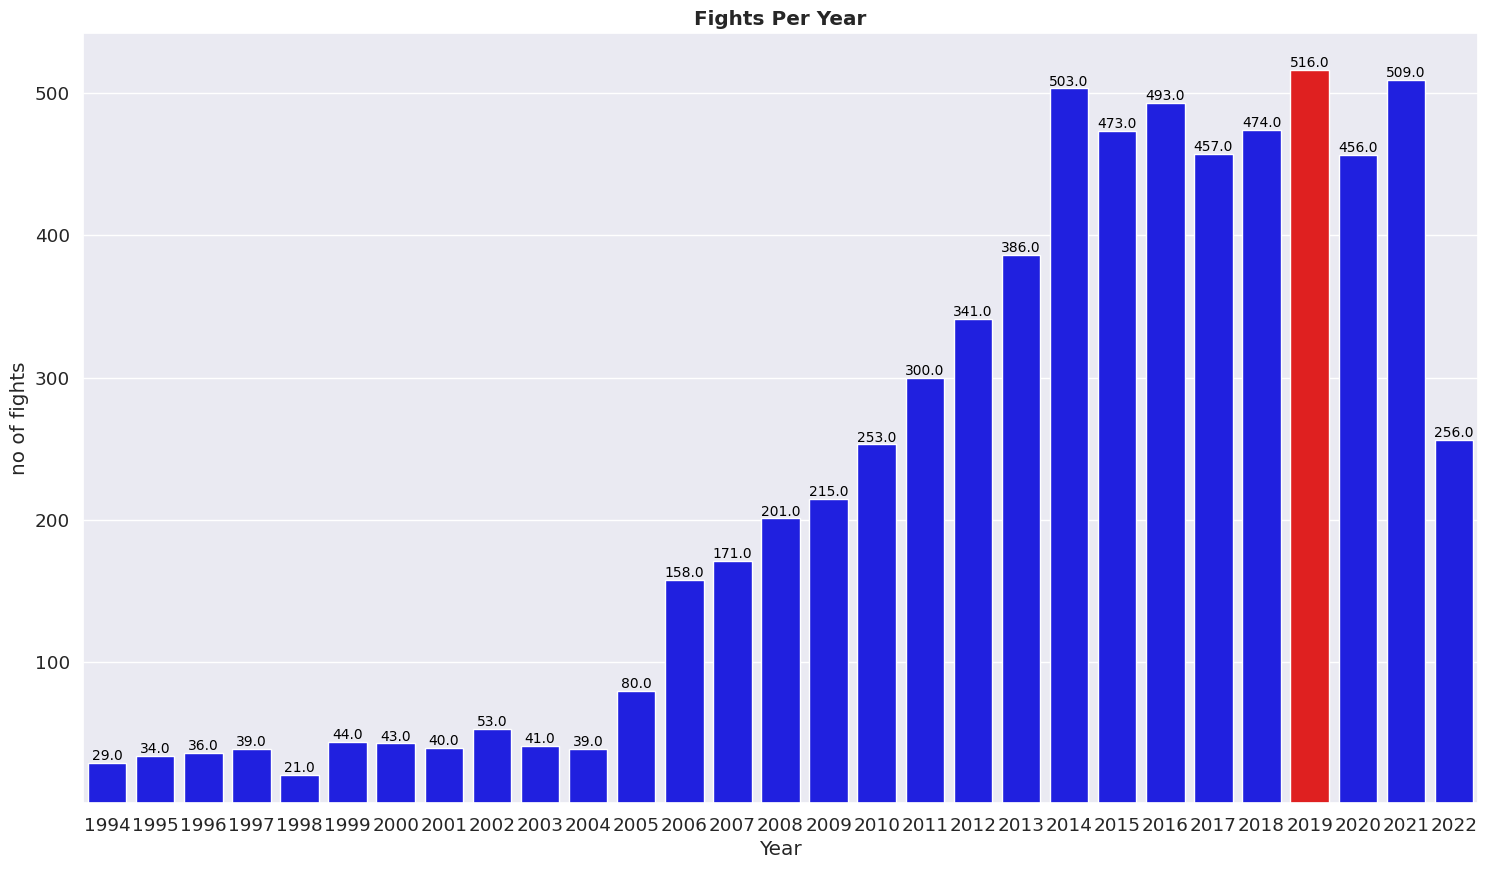

In [14]:
fights_by_year = pd.DataFrame(fights_df.groupby("year")["result"].count()//2).rename(columns ={"result":"no of fights"})
values = fights_by_year["no of fights"]
colors = ['blue' if (y < max(values)) else 'red' for y in values ]
sns.set(font_scale = 1.2)
plt.figure(figsize=(18,10))
bar = sns.barplot(x=fights_by_year.index, y=values, palette=colors)

ax = plt.gca()
y_max = values.max()
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),
        fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('no of fights')
plt.title('Fights Per Year',weight='bold')
plt.show()

# Продолжительность матча в зависимости от способа его окончания

Мы видим, что в первые годы среднее время боя было ниже, поскольку больше боев заканчивалось нокаутом/техническим нокаутом или сабмишеном. С течением времени среднее время уменьшается, поскольку на решение уходит больше боев.

In [15]:
replace_map = {
    "M-DEC": "DEC",
    "S-DEC" : "DEC",
    "U-DEC": "DEC",
    "DRAW": "DEC"

}
df1=fights_df.copy()
df1["method"] = df1["method"].replace(replace_map)

df1 = df1.groupby("year")["method"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

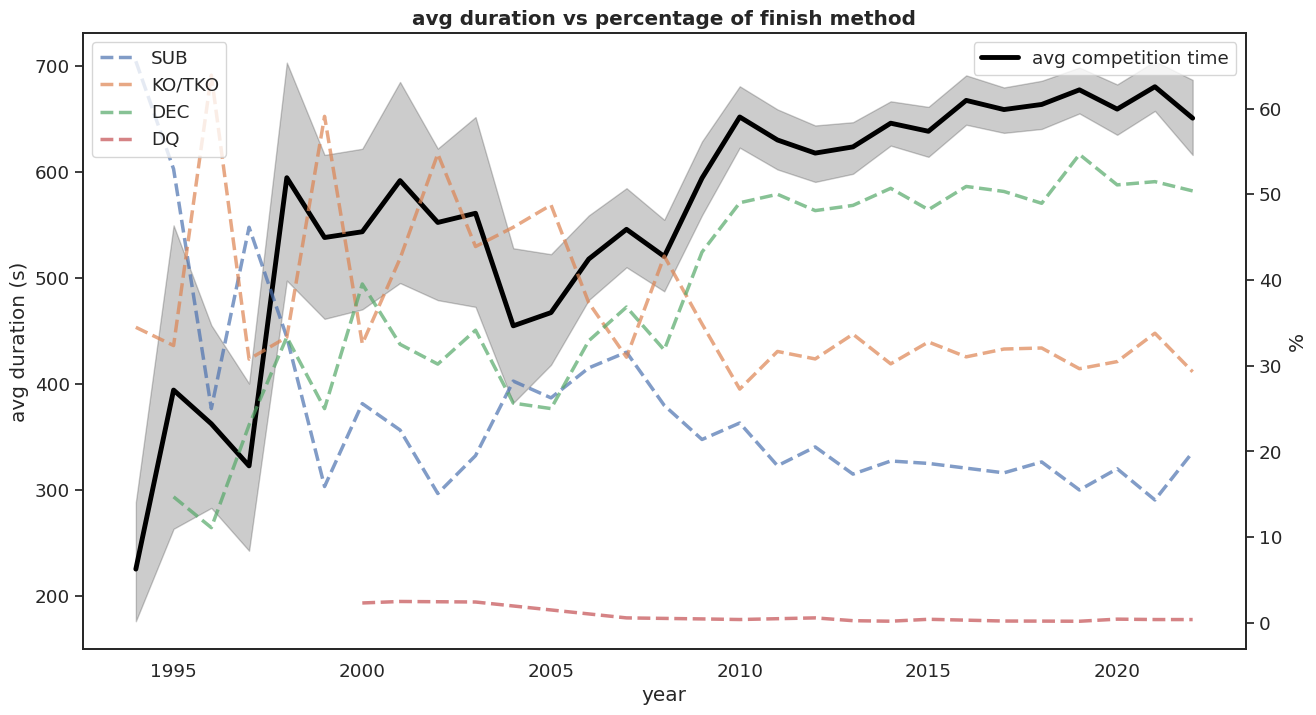

In [16]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,8))
g = sns.lineplot(x="year", y="total_comp_time", data= fights_df, color='black', ax=ax,linewidth = 3.5, label = "avg competition time" )
ax1=ax.twinx()
g1 = sns.lineplot(x="year",y='percent', hue ="method",data=df1,  markers=True, dashes=False, linewidth = 2.5, ax=ax1,alpha=0.7,linestyle='--')
g.set_title("avg duration vs percentage of finish method",weight='bold')
ax1.legend(loc="upper left")
ax.set(ylabel='avg duration (s)')
ax1.set(ylabel='%')
plt.xticks(rotation=90)
plt.show()

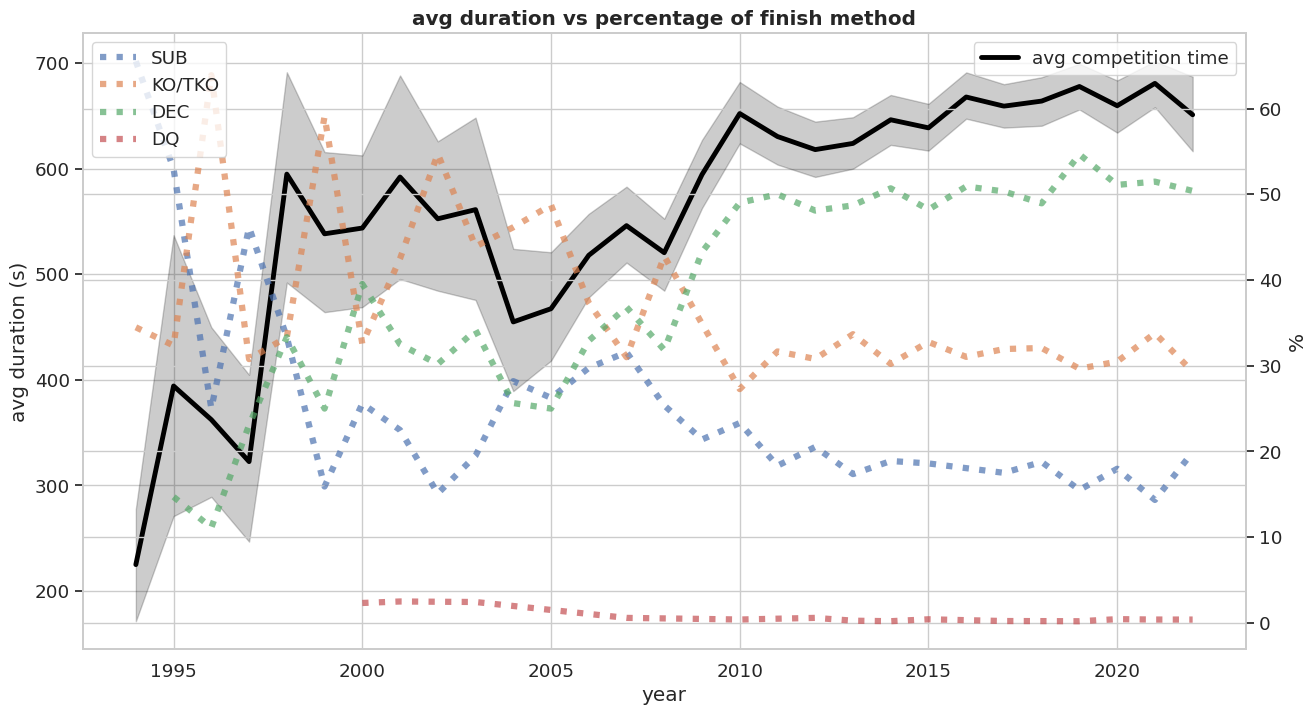

In [17]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
g = sns.lineplot(x="year", y="total_comp_time", data= fights_df, color='black', ax=ax,linewidth = 3.5, label = "avg competition time" )
ax1=ax.twinx()
g1 = sns.lineplot(x="year",y='percent', hue ="method",data=df1,  markers=True, dashes=True, linewidth = 4.5, ax=ax1,alpha=0.7,linestyle='dotted')
g.set_title("avg duration vs percentage of finish method",weight='bold')
ax1.legend(loc="upper left")
ax.set(ylabel='avg duration (s)')
ax1.set(ylabel='%')
plt.xticks(rotation=90)
plt.show()

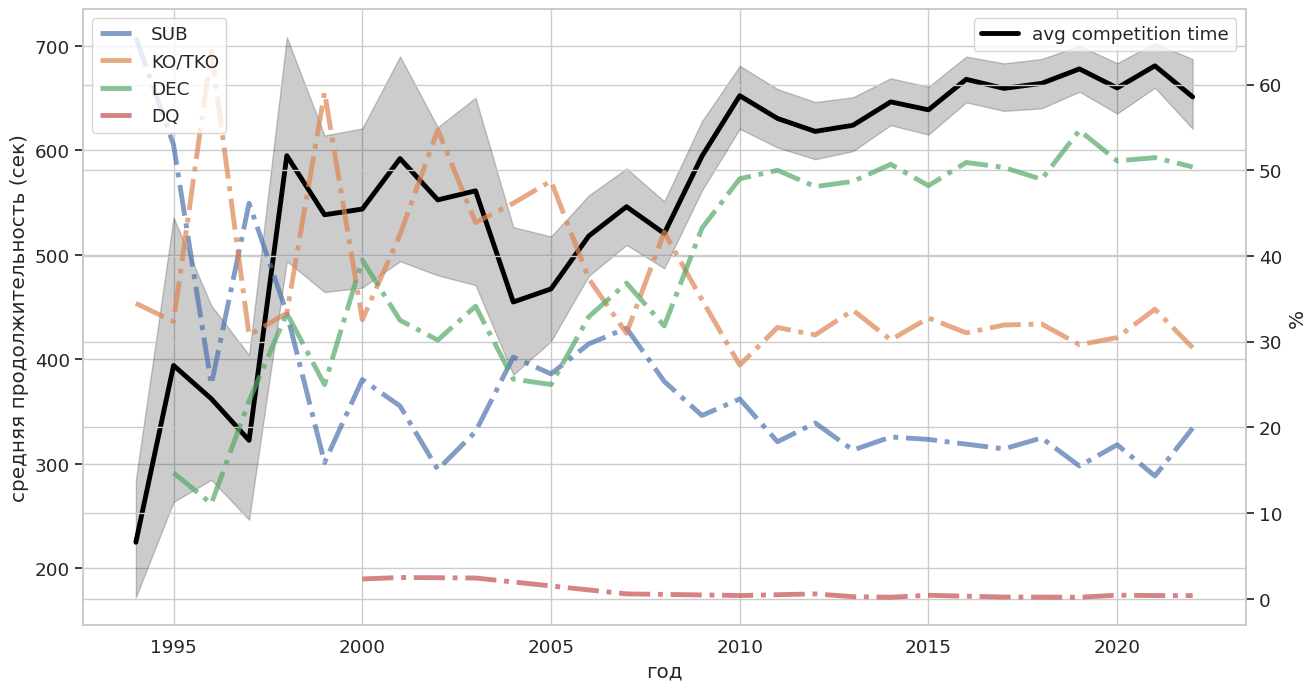

In [18]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
g = sns.lineplot(x="year", y="total_comp_time", data= fights_df, color='black', ax=ax,linewidth = 3.5, label = "avg competition time" )
ax1=ax.twinx()
g1 = sns.lineplot(x="year",y='percent', hue ="method",data=df1,  markers=True, dashes=True, linewidth = 3.5, ax=ax1,alpha=0.7,linestyle='dashdot')
#g.set_title("avg duration vs percentage of finish method",weight='bold')
ax1.legend(loc="upper left")
ax.set(ylabel='средняя продолжительность (сек)')
ax1.set(ylabel='%')
ax.set(xlabel='год')
plt.xticks(rotation=90)
plt.show()

# Weight divisions EDA

In [19]:
fights_df.division.value_counts()

division
Lightweight              2362
Welterweight             2324
Middleweight             1794
Heavyweight              1266
Featherweight            1252
Light Heavyweight        1222
Bantamweight             1098
Flyweight                 524
Women's Strawweight       470
Women's Bantamweight      338
Women's Flyweight         330
Open Weight               204
Catch Weight               90
Women's Featherweight      46
Super Heavyweight           2
Name: count, dtype: int64

In [20]:
fights_df.division.value_counts(normalize = True)

division
Lightweight              0.177301
Welterweight             0.174448
Middleweight             0.134664
Heavyweight              0.095031
Featherweight            0.093980
Light Heavyweight        0.091728
Bantamweight             0.082420
Flyweight                0.039333
Women's Strawweight      0.035280
Women's Bantamweight     0.025372
Women's Flyweight        0.024771
Open Weight              0.015313
Catch Weight             0.006756
Women's Featherweight    0.003453
Super Heavyweight        0.000150
Name: proportion, dtype: float64

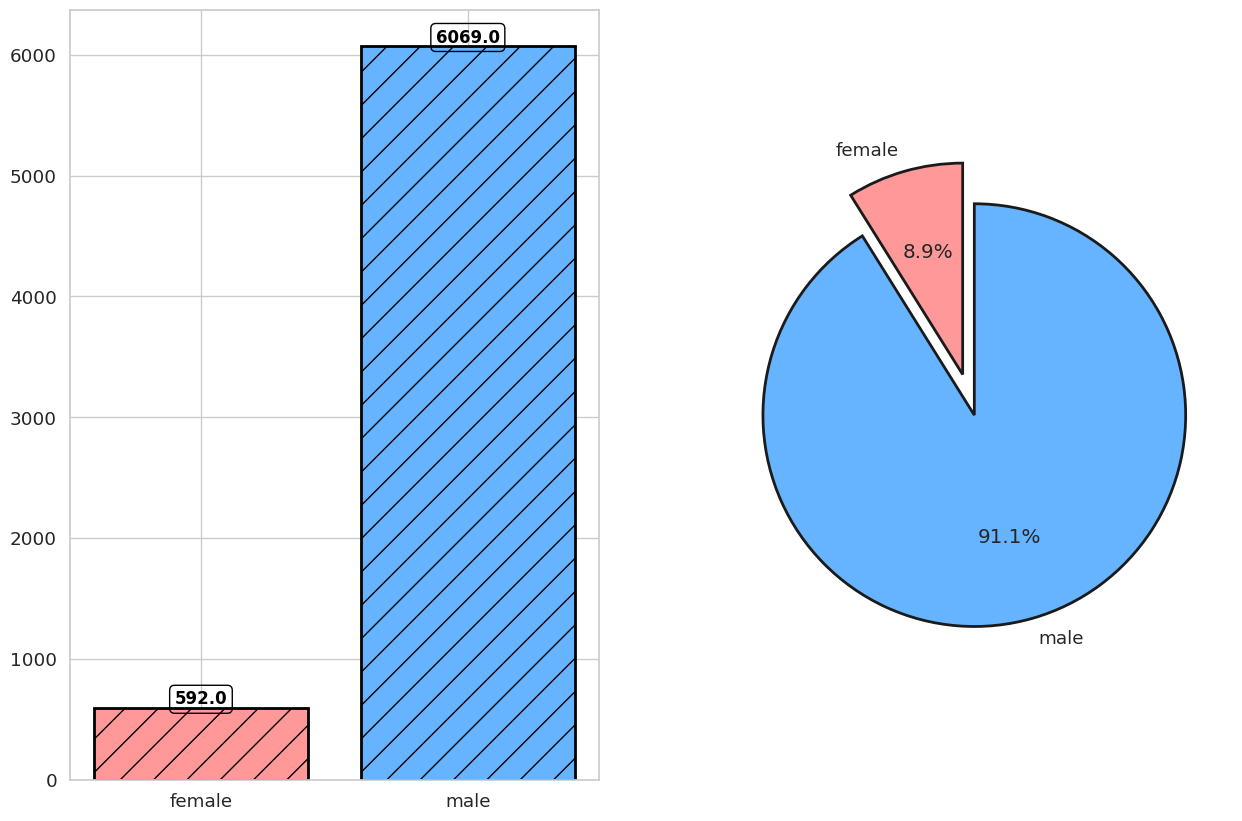

In [21]:
fights_df["gender"] = fights_df.division.apply(lambda x: "female" if x[0:3]=="Wom" else "male")

labels = "female", "male"
fig1, ax1 = plt.subplots(1,2, figsize=(15,10))
ax1[1].pie(fights_df.groupby(["gender"])["gender"].count()/2,explode=(0.1, 0.1), autopct='%1.1f%%', labels= labels,
        startangle=90,colors=['#ff9999','#66b3ff'],wedgeprops={'linewidth': 2, 'edgecolor': 'k'},labeldistance=1.1)

ax1[0].bar(("female", "male"), fights_df.groupby(["gender"])["gender"].count()/2, color=['#ff9999','#66b3ff'],edgecolor="black", hatch='/',linewidth=2)
for p in ax1[0].patches:
    ax1[0].text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),
        fontsize=12, color='black', ha='center', va='bottom', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1))
plt.show()


Let's remove divisions with small amount of fights

In [22]:
fights_df = fights_df[fights_df.gender!="female"]
fights_df = fights_df[~fights_df["division"].isin(["Open Weight", "Catch Weight", "Super Heavyweight"])]
weights=["Flyweight", "Bantamweight", "Featherweight", "Lightweight", "Welterweight", "Middleweight", "Light Heavyweight", "Heavyweight"]

In [23]:
import numpy as np
pivot = fights_df.pivot_table(values="result", index="division", columns="method", aggfunc="count", fill_value = 0).apply(lambda x: x//2)
pivot["total_fights"] = pivot.iloc[:,0:7].sum(axis=1)
pivot

method,DQ,DRAW,KO/TKO,M-DEC,S-DEC,SUB,U-DEC,total_fights
division,,,,,,,,
Bantamweight,1,15,156,3,68,114,192,549
Featherweight,1,14,165,4,64,101,277,626
Flyweight,0,4,59,0,34,50,115,262
Heavyweight,3,12,341,9,28,96,144,633
Light Heavyweight,3,15,266,6,43,104,174,611
Lightweight,2,21,329,10,119,271,429,1181
Middleweight,4,11,333,3,77,199,270,897
Welterweight,5,17,377,10,112,216,425,1162


 M Dec Решением большинства двое из трех судей соглашаются с тем, какой боец ​​выиграл поединок, а третий судья указывает, что ни один боец ​​не выиграл.

 Ничья по большинству (MD) действительно редка, но все же случается. Это означает, что двое из трех судей считают, что ни один боец ​​не выиграл и не проиграл, и выставляют ничью, в то время как третий судья ставит оценку в явную пользу одного из бойцов.

Этот результат настолько необычен, что вы часто увидите, как фанаты и бойцы не понимают, что это значит, когда оглашается решение.
Что касается титулов, то в случае ничьей по большинству боец, вышедший в бой чемпионом, сохраняет свое чемпионство.

Во время первого боя Тайрона Вудли против Стивена Томпсона Брюс Баффер неправильно интерпретировал результат как раздельное решение, прежде чем ему пришлось внести исправление и объявить ничью по большинству.

Вудли казался явно расстроенным, пока Джо Роган не объяснил, что он по-прежнему чемпион.

 Раздельное решение (SD) является критерием победы в боксе, чаще всего в полноконтактных единоборствах, в которых двое из трех судей оценивают одного конкретного спортсмена как победителя, а третий судья оценивает другого участника. Раздельное решение отличается от решения большинства.

In [24]:
time_by_division = pd.DataFrame(fights_df.groupby("division")["total_comp_time"].sum()//2)

pivot = pivot.join(time_by_division)
pivot["sub/time"] = pivot["total_comp_time"]//pivot["SUB"]
pivot["KO/TKO_time"] = pivot["total_comp_time"]//pivot["KO/TKO"]

<ipython-input-25-d80240cf671f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=pivot.index,y="total_fights",  data= pivot, order = weights, ax =ax[0], palette = colors, edgecolor="black",hatch='/')
<ipython-input-25-d80240cf671f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90, size = 10, weight='bold')


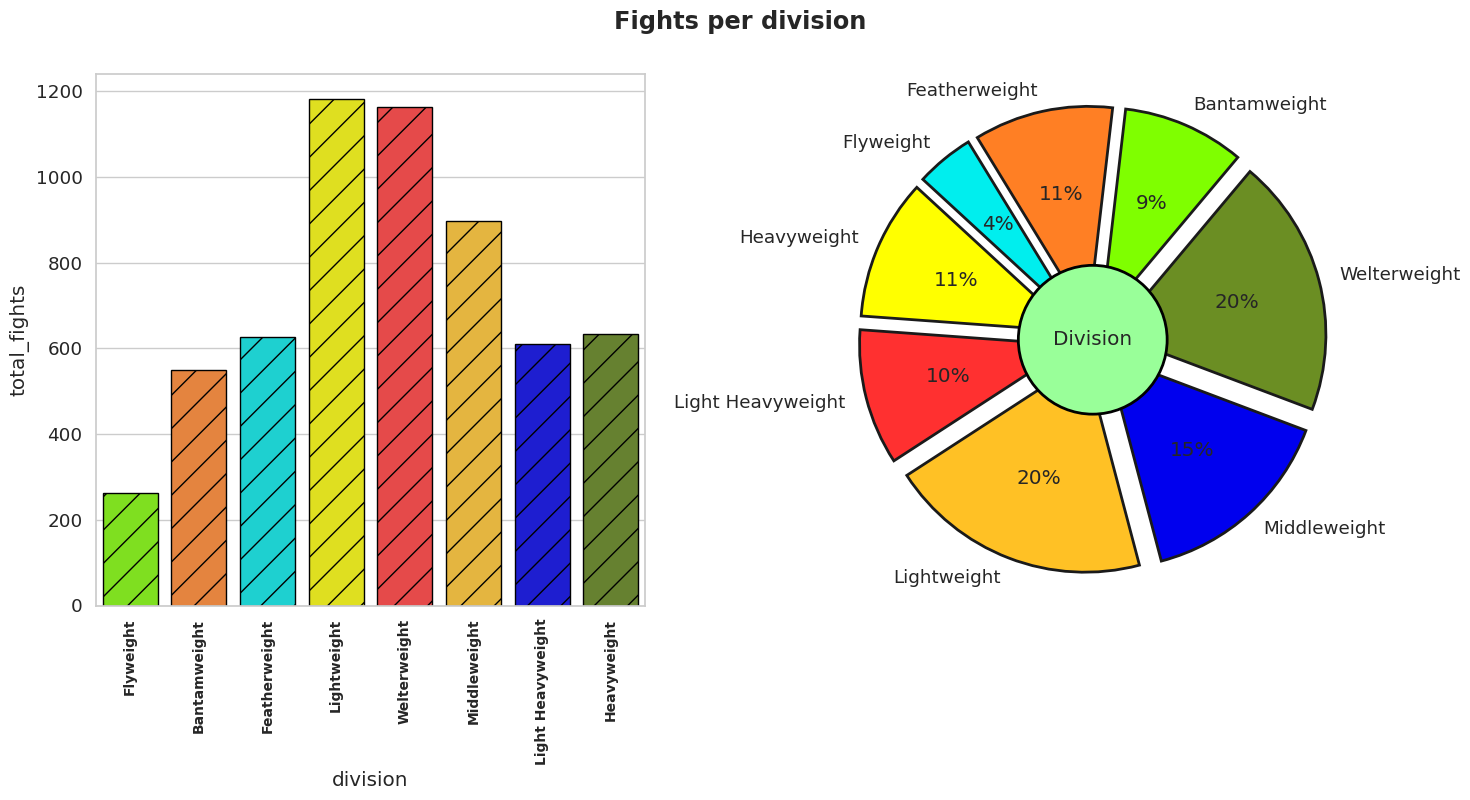

In [25]:
colors = ['#7FFF00', '#FF7F24', '#00EEEE', '#FFFF00', '#FF3030', '#FFC125', '#0000EE', '#6B8E23']
fig, ax=plt.subplots(1, 2, figsize=(15,8))
g=sns.barplot(x=pivot.index,y="total_fights",  data= pivot, order = weights, ax =ax[0], palette = colors, edgecolor="black",hatch='/')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90, size = 10, weight='bold')
x=0
y=0

ax[1].pie(x= pivot["total_fights"], labels = pivot.index, colors = colors, autopct='%.0f%%',
            explode=[0.1 for i in pivot.index], startangle=50,
            wedgeprops={'linewidth': 2, 'edgecolor': 'k'},labeldistance=1.1)
ax[1].add_artist(plt.Circle((0, 0), 0.35, fc='#99ff99', ec='black', lw=2))
ax[1].annotate("Division", xy=(x, y),va="center",  ha="center")
fig.suptitle("Fights per division", y=1, weight = 'bold')
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

<ipython-input-26-89cc779220b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=pivot.index,y="total_fights",  data= pivot, order = weights, ax =ax[0], palette = colors, edgecolor="black",hatch='/')
<ipython-input-26-89cc779220b1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90, size = 10, weight='bold')


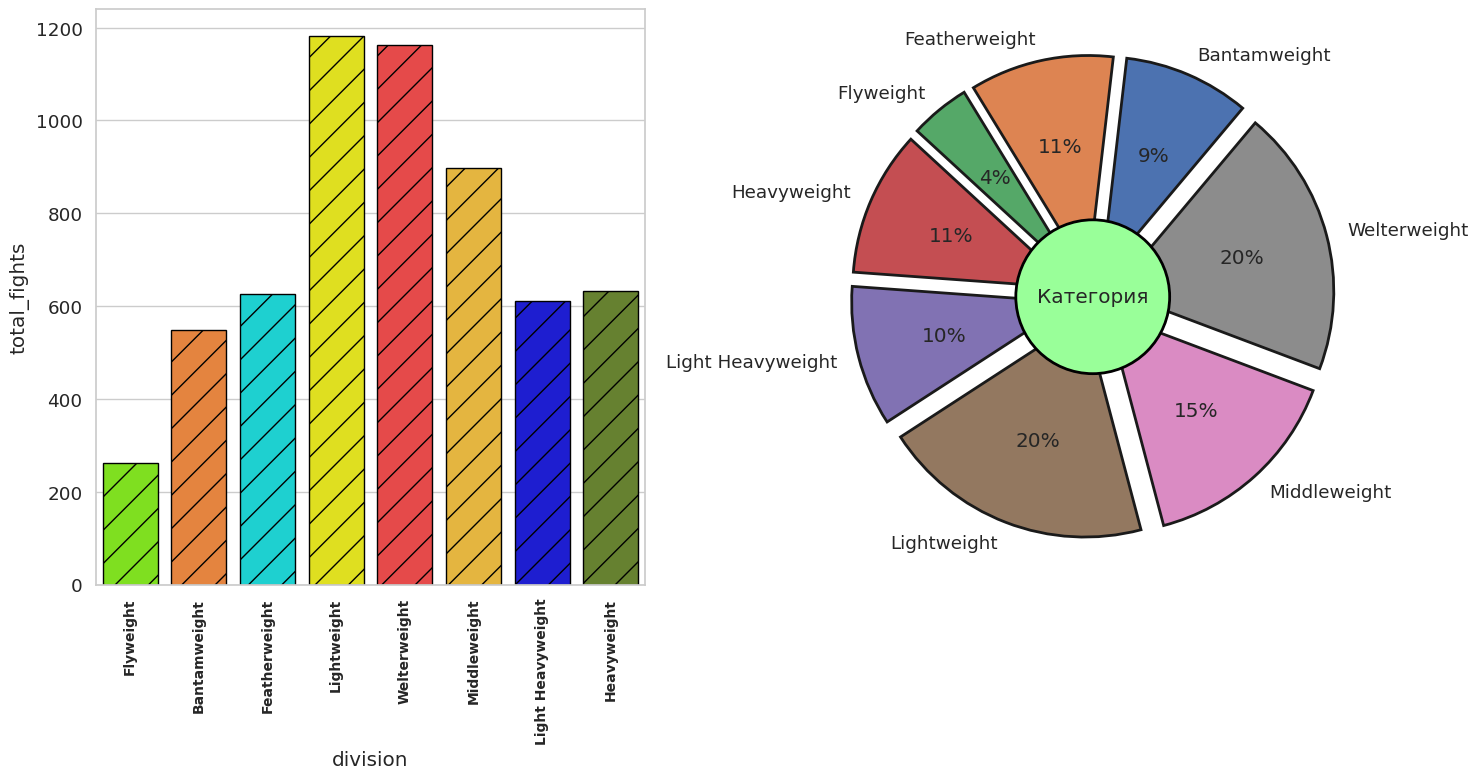

In [26]:
#colors = ['#7FFF00', '#FF7F24', '#00EEEE', '#FFFF00', '#FF3030', '#FFC125', '#0000EE', '#6B8E23']
fig, ax=plt.subplots(1, 2, figsize=(15,8))
g=sns.barplot(x=pivot.index,y="total_fights",  data= pivot, order = weights, ax =ax[0], palette = colors, edgecolor="black",hatch='/')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90, size = 10, weight='bold')
x=0
y=0

ax[1].pie(x= pivot["total_fights"], labels = pivot.index,  autopct='%.0f%%',
            explode=[0.1 for i in pivot.index], startangle=50,
            wedgeprops={'linewidth': 2, 'edgecolor': 'k'},labeldistance=1.1)
ax[1].add_artist(plt.Circle((0, 0), 0.35, fc='#99ff99', ec='black', lw=2))
ax[1].annotate("Категория", xy=(x, y),va="center",  ha="center")
#fig.suptitle("Fights per division", y=1, weight = 'bold')
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

In [27]:
fights_df["opponent_control"] = fights_df["control"]/fights_df["control_differential"]
fights_df["total_control"] = fights_df["control"] + fights_df["opponent_control"]
fights_df["clear_time_on_feet"] = fights_df["total_comp_time"] - fights_df["total_control"]
fights_df["strikes_per_min_standup"] =(fights_df["total_strikes_attempts"]/fights_df["clear_time_on_feet"])*60

gr_by_fights=fights_df.groupby("fight_url")[["control","total_comp_time", "division"]].agg({"control": "sum", "total_comp_time":"sum", "division": "first"})
gr_by_fights["total_comp_time"] = gr_by_fights["total_comp_time"].apply(lambda x: x//2)
gr_by_fights["standup_time"] = gr_by_fights["total_comp_time"]-gr_by_fights["control"]

gr_by_fights = gr_by_fights[["division", "standup_time", "control"]]
gr_by_fights_melted = pd.melt(gr_by_fights, id_vars=["division"], value_vars =['standup_time', 'control'])

<ipython-input-28-a56a56037874>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x="division", y ="total_comp_time", data = fights_df, order=weights, ax=axes[0], palette = colors,edgecolor="black")
<ipython-input-28-a56a56037874>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90, size = 10, weight='bold')
<ipython-input-28-a56a56037874>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 90, size = 10, weight='bold')


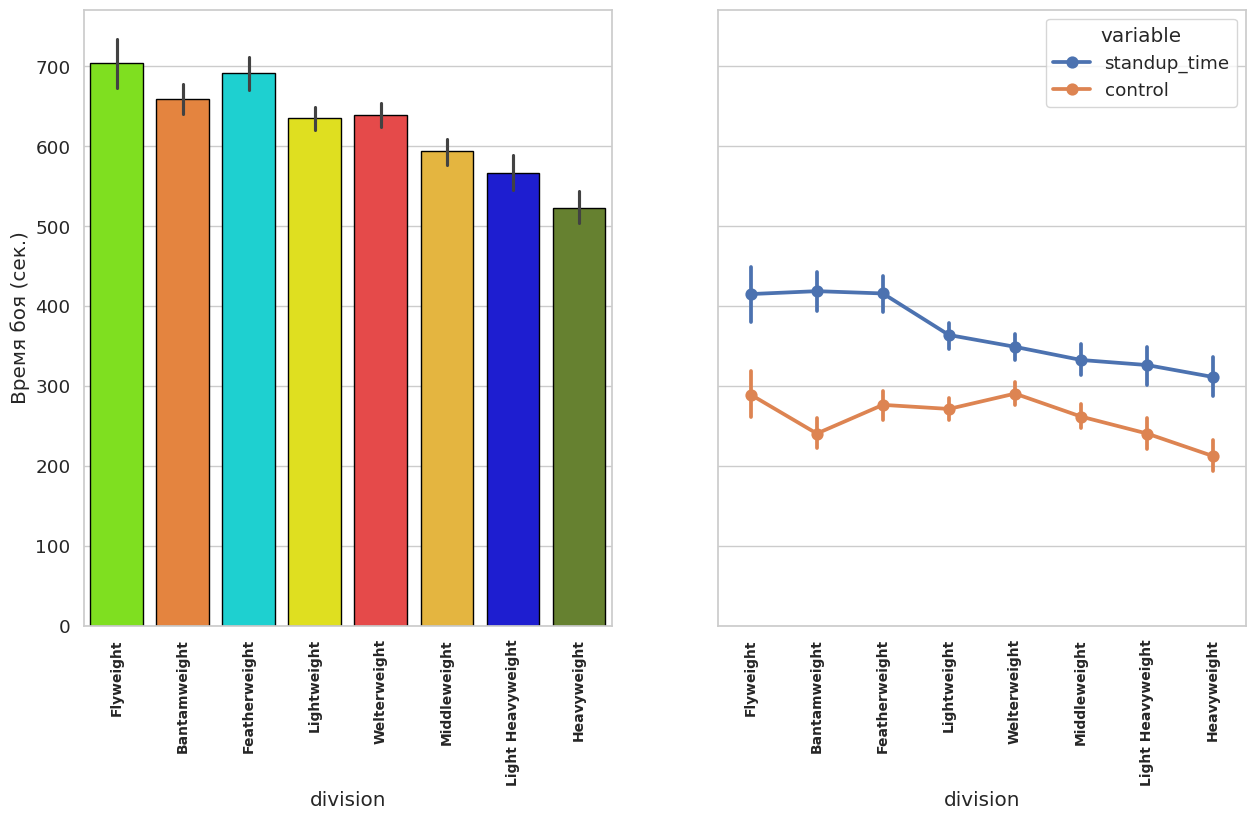

In [28]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize=(15,8))
g=sns.barplot(x="division", y ="total_comp_time", data = fights_df, order=weights, ax=axes[0], palette = colors,edgecolor="black")
g1=sns.pointplot(data = gr_by_fights_melted, x="division", y="value", hue = "variable", order = weights, ax=axes[1])
axes[0].set_ylabel("Время боя (сек.)")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90, size = 10, weight='bold')
#axes[0].set_title('avg comp time per division',weight='bold')
#axes[1].set_ylabel("Количество действий")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 90, size = 10, weight='bold')
#axes[1].set_title('ground vs striking',weight='bold')
plt.show()

Сколько секунд необходимо для нокаута или сабмишена? Мы видим, что время положительного нокаута/технического нокаута коррелирует со средней продолжительностью боя.

<ipython-input-29-a7e684018cb7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(y=pivot.index, x="KO/TKO_time", data=pivot, order=weights,ax=axes[0],palette = colors, edgecolor="black")
<ipython-input-29-a7e684018cb7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g1=sns.barplot(y=pivot.index, x="sub/time", data=pivot, order=weights, ax=axes[1],palette = colors, edgecolor="black")


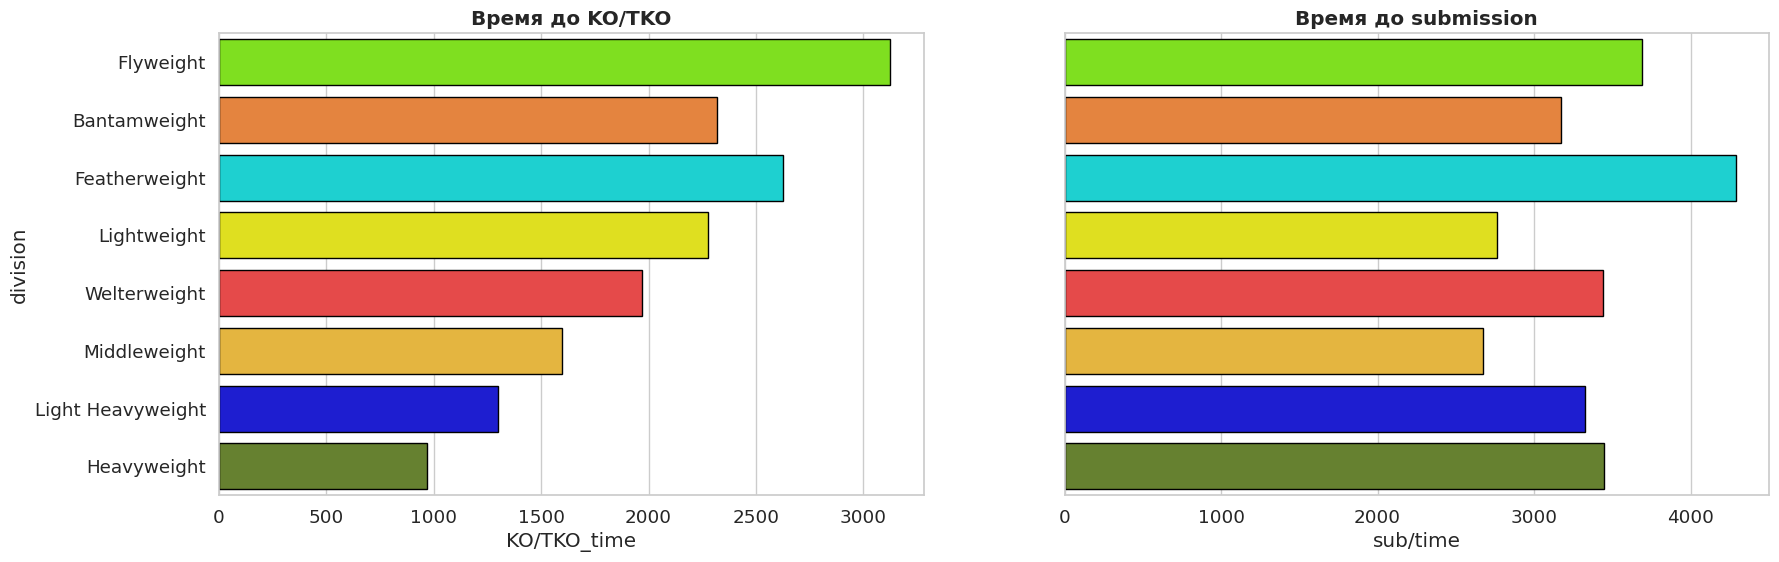

In [29]:
fig, axes = plt.subplots(1, 2, sharey=True,figsize=(20,6))
g=sns.barplot(y=pivot.index, x="KO/TKO_time", data=pivot, order=weights,ax=axes[0],palette = colors, edgecolor="black")
g1=sns.barplot(y=pivot.index, x="sub/time", data=pivot, order=weights, ax=axes[1],palette = colors, edgecolor="black")
axes[0].set_title('Время до KO/TKO',weight='bold')
axes[1].set_title('Время до submission',weight='bold')
g1.set_ylabel('')
plt.show()

<ipython-input-30-f7da9c7ce246>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="strikes_per_min_standup",y="division", data=fights_df,order = weights,edgecolor="black",palette = colors,  ci= None)
<ipython-input-30-f7da9c7ce246>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="strikes_per_min_standup",y="division", data=fights_df,order = weights,edgecolor="black",palette = colors,  ci= None)


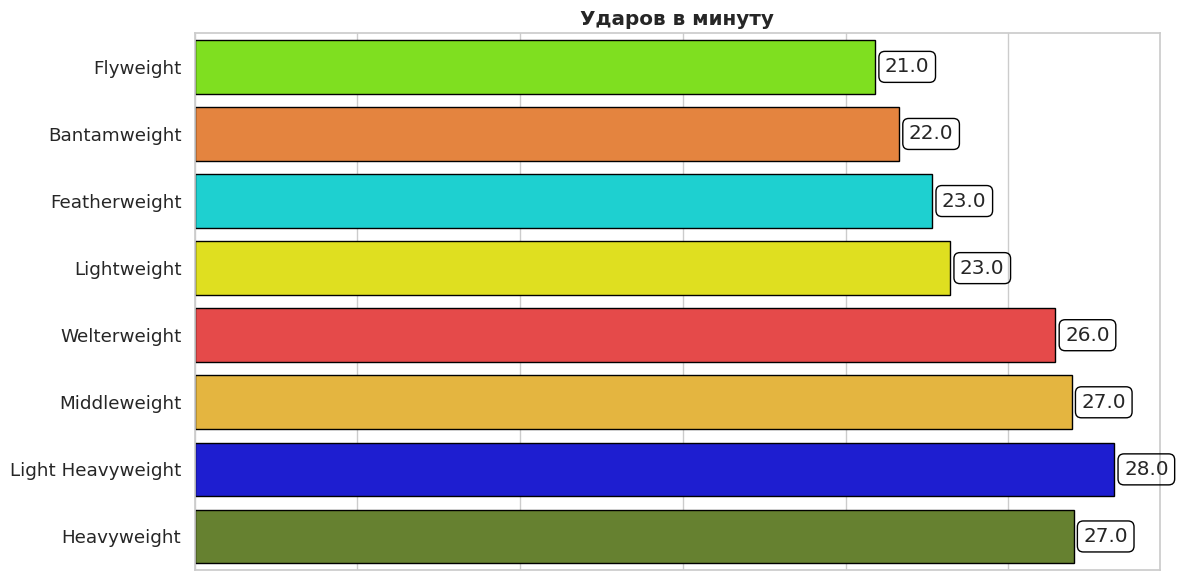

In [30]:
plt.figure(figsize=(12,6))
g = sns.barplot(x="strikes_per_min_standup",y="division", data=fights_df,order = weights,edgecolor="black",palette = colors,  ci= None)
g.set(xticklabels=[])
plt.xticks(rotation=90)
g.set(ylabel=None, xlabel=None)
g.set_title('Ударов в минуту',weight='bold')
for p in g.patches:
    value = round(p.get_width(),0)
    x = p.get_x() + p.get_width() +0.3
    y = p.get_y() + p.get_height() / 2
    g.text(x, y, value, ha='left', va='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1))

plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()


How difference in ground control and significant strikes affect a result of a match.

if Fighter1 have ground control 300s and Fighter2 100s -> control_diff Fighter1 = 200s ; control_diff Fighter2 = -200s. Same logic with significant strikes landed

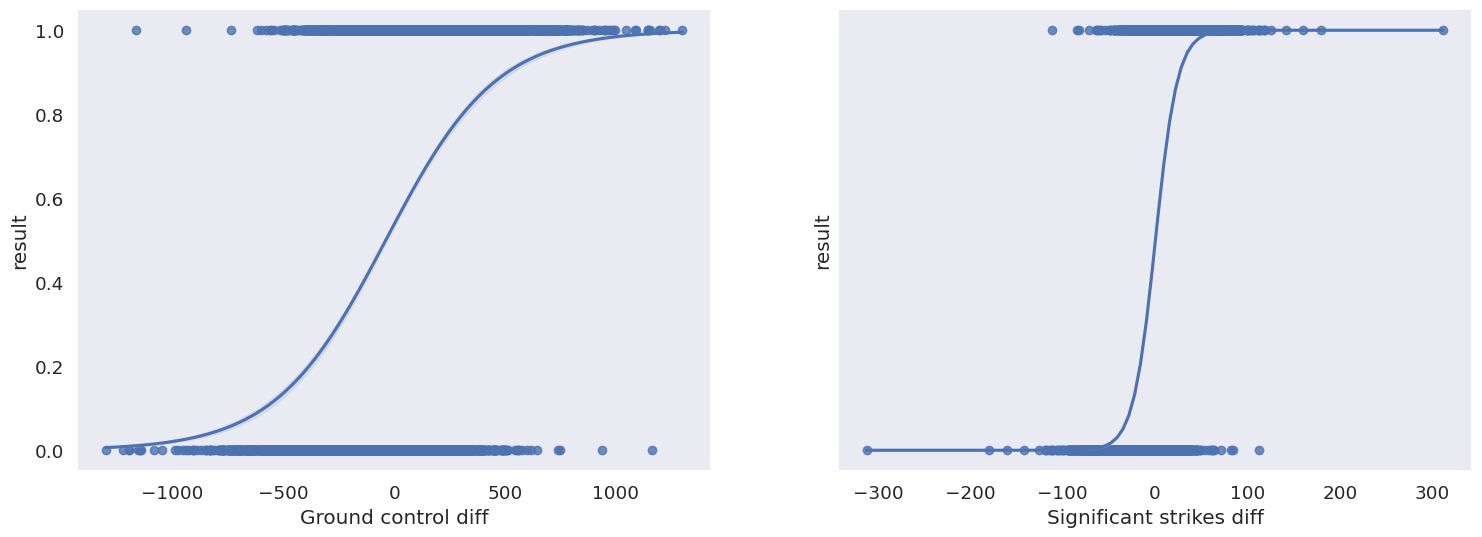

In [31]:
fights_df["opponent_sig_strikes"] = fights_df["sig_strikes_landed"]/fights_df["sig_strikes_landed_differential"]
fights_df["control_diff"] = fights_df["control"]  - fights_df["opponent_control"]
fights_df["sig_strike_diff_s"] = fights_df["sig_strikes_landed"]  - fights_df["opponent_sig_strikes"]

sns.set_style("dark")
fig, axes = plt.subplots(1, 2, sharey=True,figsize=(18,6))
g=sns.regplot(x="control_diff", y="result", data = fights_df, logistic=True,ax = axes[0])
g.set( xlabel ="Ground control diff")
g1=sns.regplot(x="sig_strike_diff_s", y="result", data = fights_df, logistic=True,ax = axes[1])
g1.set( xlabel ="Significant strikes diff")
plt.show()

<Figure size 1200x600 with 0 Axes>

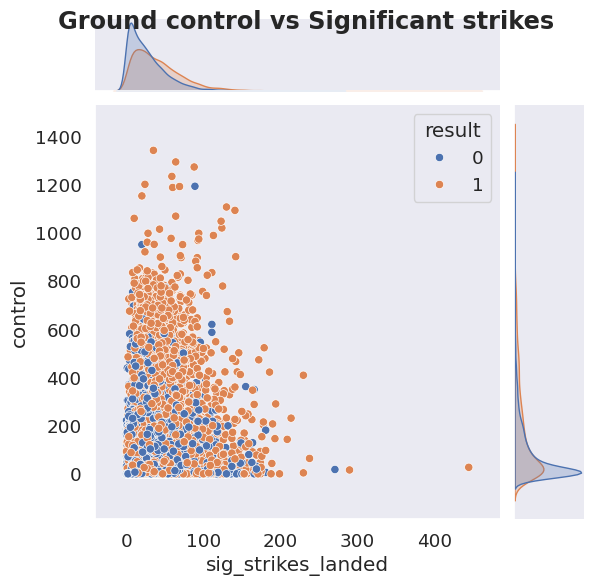

In [32]:
plt.figure(figsize=(12,6))
g = sns.jointplot(data=fights_df, x="sig_strikes_landed", y="control", hue="result")
plt.suptitle('Ground control vs Significant strikes', weight='bold')
plt.show()

# Dispersion

In [33]:
pivot

,DQ,DRAW,KO/TKO,M-DEC,S-DEC,SUB,U-DEC,total_fights,total_comp_time,sub/time,KO/TKO_time
division,,,,,,,,,,,
Bantamweight,1,15,156,3,68,114,192,549,361655,3172,2318
Featherweight,1,14,165,4,64,101,277,626,433060,4287,2624
Flyweight,0,4,59,0,34,50,115,262,184382,3687,3125
Heavyweight,3,12,341,9,28,96,144,633,331057,3448,970
Light Heavyweight,3,15,266,6,43,104,174,611,345967,3326,1300
Lightweight,2,21,329,10,119,271,429,1181,749545,2765,2278
Middleweight,4,11,333,3,77,199,270,897,532681,2676,1599
Welterweight,5,17,377,10,112,216,425,1162,742595,3437,1969


In [34]:
pivot.iloc[0],

(DQ                      1
 DRAW                   15
 KO/TKO                156
 M-DEC                   3
 S-DEC                  68
 SUB                   114
 U-DEC                 192
 total_fights          549
 total_comp_time    361655
 sub/time             3172
 KO/TKO_time          2318
 Name: Bantamweight, dtype: int64,)

In [35]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(pivot['KO/TKO_time']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.983, p-value=0.977
Принять гипотезу о нормальности, (не отклонять H0)


In [36]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(pivot['sub/time']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.950, p-value=0.708
Принять гипотезу о нормальности, (не отклонять H0)


In [37]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(pivot['DRAW']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.948, p-value=0.693
Принять гипотезу о нормальности, (не отклонять H0)


In [38]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(pivot['KO/TKO']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.893, p-value=0.250
Принять гипотезу о нормальности, (не отклонять H0)


In [39]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(pivot['total_comp_time']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.909, p-value=0.345
Принять гипотезу о нормальности, (не отклонять H0)


In [40]:
# Friedman test

from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(pivot.iloc[0],pivot.iloc[1],pivot.iloc[2],pivot.iloc[3],pivot.iloc[4],pivot.iloc[5],pivot.iloc[6],pivot.iloc[7],)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=29.135, p=0.000
Different distributions (reject H0)


In [41]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(pivot['KO/TKO_time'], pivot['sub/time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=9.926, p=0.002
Different distributions (reject H0)


In [42]:
# Wilcoxon Т-test
from scipy.stats import wilcoxon

stat, p = wilcoxon(pivot['KO/TKO_time'], pivot['sub/time'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.000, p=0.008
Different distribution (reject H0)


# REGRESSION

In [66]:
df_reg = pivot.reset_index()
df_reg.rename(columns = {'KO/TKO_time':'kotime', 'sub/time':'subtime'}, inplace = True )
df_reg

,division,DQ,DRAW,KO/TKO,M-DEC,S-DEC,SUB,U-DEC,total_fights,total_comp_time,subtime,kotime
0,Bantamweight,1,15,156,3,68,114,192,549,361655,3172,2318
1,Featherweight,1,14,165,4,64,101,277,626,433060,4287,2624
2,Flyweight,0,4,59,0,34,50,115,262,184382,3687,3125
3,Heavyweight,3,12,341,9,28,96,144,633,331057,3448,970
4,Light Heavyweight,3,15,266,6,43,104,174,611,345967,3326,1300
5,Lightweight,2,21,329,10,119,271,429,1181,749545,2765,2278
6,Middleweight,4,11,333,3,77,199,270,897,532681,2676,1599
7,Welterweight,5,17,377,10,112,216,425,1162,742595,3437,1969


In [68]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_reg['weight']= label_encoder.fit_transform(df_reg['division'])

df_reg['weight']= [61.2, 65.8, 56.7, 120.2, 93, 70.3, 83.9, 77.1]

df_reg

,division,DQ,DRAW,KO/TKO,M-DEC,S-DEC,SUB,U-DEC,total_fights,total_comp_time,subtime,kotime,weight
0,Bantamweight,1,15,156,3,68,114,192,549,361655,3172,2318,61.2
1,Featherweight,1,14,165,4,64,101,277,626,433060,4287,2624,65.8
2,Flyweight,0,4,59,0,34,50,115,262,184382,3687,3125,56.7
3,Heavyweight,3,12,341,9,28,96,144,633,331057,3448,970,120.2
4,Light Heavyweight,3,15,266,6,43,104,174,611,345967,3326,1300,93.0
5,Lightweight,2,21,329,10,119,271,429,1181,749545,2765,2278,70.3
6,Middleweight,4,11,333,3,77,199,270,897,532681,2676,1599,83.9
7,Welterweight,5,17,377,10,112,216,425,1162,742595,3437,1969,77.1


In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [57]:
lin_res = ols("weight ~ kotime",data=df_reg).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     37.60
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           0.000861
Time:                        11:58:24   Log-Likelihood:                -27.104
No. Observations:                   8   AIC:                             58.21
Df Residuals:                       6   BIC:                             58.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    133.0441      9.360     14.214      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [69]:
lin_res = ols("weight ~ subtime",data=df_reg).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.1455
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.716
Time:                        12:01:01   Log-Likelihood:                -34.941
No. Observations:                   8   AIC:                             73.88
Df Residuals:                       6   BIC:                             74.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.2944     55.001      1.805      0.1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [70]:
lin_res = ols("weight ~ total_comp_time",data=df_reg).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.164
Method:                 Least Squares   F-statistic:                   0.01300
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.913
Time:                        12:02:50   Log-Likelihood:                -35.028
No. Observations:                   8   AIC:                             74.06
Df Residuals:                       6   BIC:                             74.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          80.7142     20.751     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [65]:
df_reg.columns

Index(['division', 'DQ', 'DRAW', 'KO/TKO', 'M-DEC', 'S-DEC', 'SUB', 'U-DEC',
       'total_fights', 'total_comp_time', ' subtime', 'kotime', 'weight'],
      dtype='object')

# Построение модели

In [80]:
ufc_fighters = fighters_df.copy()

In [81]:
ufc_fighters.columns

Index(['url', 'fighter_name', 'nickname', 'birth_date', 'age', 'death_date',
       'location', 'country', 'height', 'weight', 'association',
       'weight_class', 'wins', 'wins_ko', 'wins_submission', 'wins_decision',
       'wins_other', 'lossess', 'losses_ko', 'losses_submission',
       'losses_decision', 'losses_other'],
      dtype='object')

In [82]:
fights_df.columns

Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method',
       ...
       'ground_strikes_def_differential', 'year', 'gender', 'opponent_control',
       'total_control', 'clear_time_on_feet', 'strikes_per_min_standup',
       'opponent_sig_strikes', 'control_diff', 'sig_strike_diff_s'],
      dtype='object', length=112)

In [83]:
ufc_fighters.rename(columns = {'fighter_name':'fighter'}, inplace = True)

In [84]:
#ufc_fighters = ufc_fighters.drop("location", axis=1)
ufc_fighters["no_of_matches"] = ufc_fighters['fighter'].map(fights_df['fighter'].value_counts())
ufc_fighters=ufc_fighters.drop_duplicates("fighter")
ufc_fighters = ufc_fighters.set_index("fighter")
fighters_to_analyze = pd.DataFrame(ufc_fighters.index[ufc_fighters["no_of_matches"]>3])

In [85]:
def skills(fighter_name):

  time_total = fights_df["total_comp_time"][(fights_df["fighter"]==fighter_name)].sum()
  time_ground_control = fights_df["control"][(fights_df["fighter"]==fighter_name)].sum()
  no_of_fights= ufc_fighters.loc[fighter_name]["no_of_matches"]
  time_standup = time_total - fights_df["control"][(fights_df["fighter"]==fighter_name)].sum()

  def ground_skills_def():
    sub_losses = fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["result"]==0) & (fights_df["method"]=="SUB")].count()
    sub_losses_ratio = sub_losses/no_of_fights

    ground_op_control = fights_df["opponent_control"][(fights_df["fighter"]==fighter_name)].sum()
    op_control_ratio = ground_op_control/time_total

    g_a_p_deff = g_a_p = fights_df["ground_strikes_def"][(fights_df["fighter"]==fighter_name)].mean()/100
    takedown_def = fights_df["takedowns_def"][fights_df["fighter"]==fighter_name].mean()/100
    reversal_skill = (fights_df["reversals"][fights_df["fighter"]==fighter_name].sum()/no_of_fights)
    skill_total = (takedown_def+ reversal_skill - (sub_losses_ratio*2)+g_a_p_deff)*(1-op_control_ratio)
    return skill_total if skill_total > 0 else 0


  def ground_skills_att():
    sub_winner = fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["result"]==1) & (fights_df["method"]=="SUB")].count()
    sub_winner_ratio = sub_winner/no_of_fights
    ground_control_coef = (1-(time_ground_control/time_total))

    g_a_p = fights_df["ground_strikes_landed"][(fights_df["fighter"]==fighter_name)].sum()/time_total
    takedown_att = fights_df[fights_df["fighter"]==fighter_name]["takedowns_accuracy"].mean()/100

    skill_total = (takedown_att+ g_a_p + (sub_winner_ratio*2))/ground_control_coef
    return (skill_total)

  def standing_skills_att():

    ko_wins = fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["result"]==1) & (fights_df["method"]=="KO/TKO")].count()
    ko_wins_ratio = ko_wins/no_of_fights
    standup_ratio = time_standup/time_total
    ground_strikes = fights_df["ground_strikes_attempts"][fights_df["fighter"]==fighter_name].sum()

    sig_strikes_eff = (fights_df["sig_strikes_landed"][(fights_df["fighter"]==fighter_name)].sum()-ground_strikes)/time_standup
    hand_speed =(fights_df[fights_df["fighter"]==fighter_name]["total_strikes_attempts"].sum() - ground_strikes)/time_standup
    clinch = fights_df[fights_df["fighter"]==fighter_name]["clinch_strikes_landed"].sum()/time_standup/fights_df[fights_df["fighter"]==fighter_name]["clinch_strikes_accuracy"].mean()/100
    accuracy = (fights_df[fights_df["fighter"]==fighter_name]["total_strikes_accuracy"].mean() + fights_df[fights_df["fighter"]==fighter_name]["distance_strikes_accuracy"].mean())/200
    total_skill = (clinch+(ko_wins_ratio*2) + (sig_strikes_eff+hand_speed+accuracy)/2)
    return (total_skill)

  def standing_skills_def():

    ko_losses = fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["result"]==0) & (fights_df["method"]=="KO/TKO")].count()
    ko_losses_ratio = ko_losses/no_of_fights

    standup_ratio = time_standup/time_total

    sig_strikes_def = fights_df["sig_strikes_def"][(fights_df["fighter"]==fighter_name)].mean()/100
    clinch_strikes_def =fights_df[fights_df["fighter"]==fighter_name]["clinch_strikes_def"].mean()/100
    distance_strikes_def = fights_df[fights_df["fighter"]==fighter_name]["distance_strikes_def"].mean()/100
    total_skill = (clinch_strikes_def-ko_losses_ratio*2 + sig_strikes_def+distance_strikes_def)*standup_ratio

    return total_skill if total_skill > 0 else 0

  def stamina():
    wins_second_round= fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["total_comp_time"]>300)& (fights_df["total_comp_time"]<=600)].sum()
    wins_third_round= fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["total_comp_time"]>600)& (fights_df["total_comp_time"]<=900)].sum()
    wins_champ_round= fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["total_comp_time"]>900)].sum()

    fights_second_round= fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["total_comp_time"]>300)& (fights_df["total_comp_time"]<=600)].count()
    fights_third_round= fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["total_comp_time"]>600)& (fights_df["total_comp_time"]<=900)].count()
    fights_champ_round= fights_df["result"][(fights_df["fighter"]==fighter_name) & (fights_df["total_comp_time"]>900)].count()

    fights_second_round = fights_second_round if fights_second_round >0 else 1
    fights_third_round = fights_third_round if fights_third_round >0 else 1
    fights_champ_round = fights_champ_round if fights_champ_round >0 else 1

    total_skill = np.array([(0.2*wins_second_round/fights_second_round),(0.6*wins_third_round/fights_third_round),(wins_champ_round/fights_champ_round)])
    return total_skill.sum()

  return (ground_skills_def(),ground_skills_att(),standing_skills_def(), standing_skills_att() ,stamina())

In [86]:
def form(fighter_name, datum):
  vysledek=''
  skore = 0
  koef =0.1
  result = ['W' if x==1 else 'L' for x in fights_df['result'][(fights_df['fighter']==fighter_name) & (fights_df['date']<datum)]]
  for vyhra in result[:-6:-1]:
    if vyhra =='W':
      skore+=koef
    else:
      skore-=koef
    koef+=0.1
    vysledek +=vyhra+' '
  vysledek=vysledek[:-1]
  return (vysledek,skore)

In [87]:
fighters_to_analyze.isna().sum()
fighters_to_analyze[["ground_def_skill","ground_att_skill", "stand_def_skill","stand_att_skill", "stamina"]] = fighters_to_analyze["fighter"].apply(skills).apply(pd.Series).astype(float)
fighters_to_analyze["stand_att_skill"] = fighters_to_analyze['stand_att_skill'].fillna(0)

In [88]:
fights_to_analyze = fights_df[["date", "fighter","opponent","result","method"]]

fights_to_analyze.loc[:,"form_skore_fighter"] = fights_to_analyze.apply(lambda x:form(x.fighter, x.date)[1], axis=1).astype(float)
fights_to_analyze.loc[:,"form_skore_opponent"] = fights_to_analyze.apply(lambda x:form(x.opponent, x.date)[1], axis=1).astype(float)

fights_to_analyze = fights_to_analyze.merge(fighters_to_analyze, on="fighter", how="inner")
fights_to_analyze = fights_to_analyze.merge(fighters_to_analyze,left_on="opponent",right_on="fighter", how="inner", suffixes=("_fighter","_opponent"))
fights_to_analyze=fights_to_analyze.drop("fighter_opponent",axis=1)
fights_to_analyze.head()

<ipython-input-88-ef97166d8d81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fights_to_analyze.loc[:,"form_skore_fighter"] = fights_to_analyze.apply(lambda x:form(x.fighter, x.date)[1], axis=1).astype(float)
<ipython-input-88-ef97166d8d81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fights_to_analyze.loc[:,"form_skore_opponent"] = fights_to_analyze.apply(lambda x:form(x.opponent, x.date)[1], axis=1).astype(float)


,date,fighter_fighter,opponent,result,method,form_skore_fighter,form_skore_opponent,ground_def_skill_fighter,ground_att_skill_fighter,stand_def_skill_fighter,stand_att_skill_fighter,stamina_fighter,ground_def_skill_opponent,ground_att_skill_opponent,stand_def_skill_opponent,stand_att_skill_opponent,stamina_opponent
0,1998-03-13,Jerry Bohlander,Kevin Jackson,1,SUB,0.3,0.4,1.204018,2.001237,1.810119,0.212740,0.3,0.750000,1.523377,2.238971,0.000000,0.000000
1,1997-07-27,Tony Fryklund,Kevin Jackson,0,SUB,0.0,0.0,0.342785,1.868140,1.014574,0.828202,0.2,0.750000,1.523377,2.238971,0.000000,0.000000
2,1997-12-21,Frank Shamrock,Kevin Jackson,1,SUB,0.0,0.3,1.238585,1.415141,2.367848,1.230637,1.2,0.750000,1.523377,2.238971,0.000000,0.000000
3,1999-01-08,Jerry Bohlander,Tito Ortiz,0,KO/TKO,0.6,0.1,1.204018,2.001237,1.810119,0.212740,0.3,1.305347,1.143868,0.990854,0.928138,0.839394
4,2005-02-05,Vitor Belfort,Tito Ortiz,0,S-DEC,0.5,0.5,1.025646,0.296940,1.218947,1.165237,0.2,1.305347,1.143868,0.990854,0.928138,0.839394


# Regression

In [89]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
X =fights_to_analyze[["ground_def_skill_fighter","ground_att_skill_fighter","stand_att_skill_fighter","stand_def_skill_fighter","stamina_fighter","form_skore_fighter",
                      "ground_def_skill_opponent", "ground_att_skill_opponent", "stand_att_skill_opponent","stand_def_skill_opponent","stamina_opponent", "form_skore_opponent" ]]
y = fights_to_analyze["result"]

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=21)

In [90]:
reg = LogisticRegression()
reg.fit(xtrain, ytrain)

y_pred_lr = reg.predict(xtest)
log_train = round(reg.score(xtrain, ytrain) * 100, 2)
log_accuracy_MinMax = round(accuracy_score(y_pred_lr, ytest) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy_MinMax ,"%")
cm = confusion_matrix(ytest, y_pred_lr, labels=reg.classes_)
#ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=reg.classes_);
#plt.title('Confusion Matrix');

Training Accuracy    : 70.72 %
Model Accuracy Score : 71.29 %


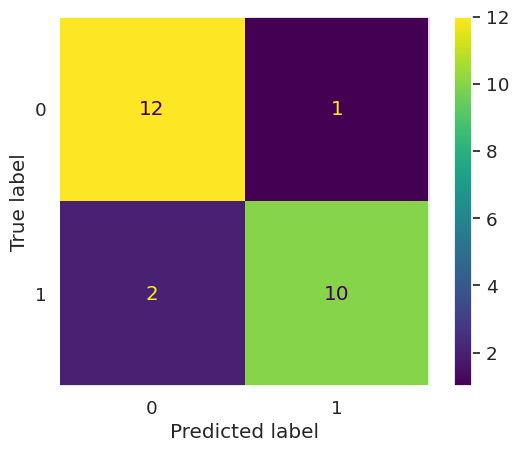

In [91]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()


# Support Vector Machines

In [92]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(xtrain, ytrain)
y_pred_svc = svc.predict(xtest)

svc_train = round(svc.score(xtrain, ytrain) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, ytest) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
#plot_confusion_matrix(svc, xtest, ytest);
#plt.title('Confusion Matrix');

Training Accuracy    : 73.93 %
Model Accuracy Score : 73.74 %


# Head2Head
нормализация навыков, чтобы получить диапазон каждого навыка от 0 до 100, просто для лучшего сравнения
normalizing skills to get 0-100 range of each skill, just for better comparsion

In [93]:
from sklearn import preprocessing
fighters_normalized = fighters_to_analyze.copy()
fighters_normalized.iloc[:,1:] =  preprocessing.normalize(fighters_normalized.iloc[:,1:])
fighters_normalized.iloc[:,1:]=fighters_normalized.iloc[:,1:].apply(lambda x:round(x*100,0))
fighters_normalized = fighters_normalized.set_index('fighter')
fighters_normalized.describe()

,ground_def_skill,ground_att_skill,stand_def_skill,stand_att_skill,stamina
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,52.919960,32.308300,53.736166,35.006917,21.418972
std,17.047224,22.615126,18.419890,15.536274,14.221101
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,15.000000,42.000000,22.000000,12.000000
50%,55.000000,28.000000,56.000000,34.000000,20.000000
75%,64.000000,48.000000,66.000000,45.000000,29.000000
max,96.000000,95.000000,96.000000,87.000000,71.000000


In [94]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import pi

def proba(fighter,opponent):
  form_fighter = form(fighter,"2022-12-12")
  form_opponent = form(opponent,"2022-12-12")
  h1 =  fighters_to_analyze[fighters_to_analyze.fighter==fighter].copy()
  h1.loc[:,'form_skore'] = form_fighter[1]
  h2=fighters_to_analyze[fighters_to_analyze.fighter==opponent].copy()
  h2.loc[:,'form_skore'] = form_opponent[1]
  h1.loc[:,"opponent"] = opponent
  h1=h1.merge(h2, left_on="opponent", right_on="fighter", how="inner",suffixes=("_fighter","_opponent"))
  h1=h1.loc[:,["ground_def_skill_fighter","ground_att_skill_fighter","stand_att_skill_fighter","stand_def_skill_fighter","stamina_fighter","form_skore_fighter",
                      "ground_def_skill_opponent", "ground_att_skill_opponent", "stand_att_skill_opponent","stand_def_skill_opponent","stamina_opponent", "form_skore_opponent"]]

  probs = svc.predict_proba(h1)
  prob_fighter = probs[0][1]
  prob_opponent = probs[0][0]
  return prob_fighter,prob_opponent



def Head2Head(fighter,opponent):
  moje_prob = proba(fighter,opponent)
  form_fighter = form(fighter,"2022-12-12")
  form_opponent = form(opponent,"2022-12-12")
  prob_fighter = moje_prob[0]
  prob_opponent = moje_prob[1]

  fig = plt.figure(figsize=(19,10))
  '''ax1 = fig.add_subplot(2,3,1)
  a=mpimg.imread('../input/pictures/' + fighter +'.png')
  ax1.imshow(a)
  plt.axis('off')
  ax2 = fig.add_subplot(2,3,3)
  a=mpimg.imread('../input/pictures/'+opponent+'.png')
  ax2.imshow(a)
  plt.axis('off')'''

  x=0
  y=0
  ax3 = fig.add_subplot(2,3,2)
  ax3.pie(x= (prob_fighter,prob_opponent), labels = (fighter,opponent), colors = ["#EE2C2C","#6495ED"], autopct='%.00f%%',
              startangle=90,
              wedgeprops={'linewidth': 2, 'edgecolor': 'k'},labeldistance=1.1,textprops={'fontsize': 14, 'weight': 'bold'})
  ax3.add_artist(plt.Circle((0, 0), 0.35, fc='white', ec='black', lw=2))
  ax3.annotate("% to win", xy=(x, y),va="center",  ha="center")
  plt.tight_layout(pad=1, w_pad=1, h_pad=1)

  #  skills plot
  #----------------------------------------------------------------------
  from matplotlib import rcParams
  rcParams['xtick.major.pad']='15'
  ax4 = fig.add_subplot(2,3,5, polar =True)
  categories=list(fighters_normalized)
  N = len(categories)

  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]

  # If you want the first axis to be on top:
  ax4.set_theta_offset(pi / 2)
  ax4.set_theta_direction(-1)

  # Draw one axe per variable + add labels
  plt.xticks(angles[:-1], categories,fontsize=10)

  # Draw ylabels
  ax4.set_rlabel_position(0)
  plt.yticks([x*10 for x in range(8)], [str(x*10) for x in range(8)], color="grey", size=10)
  plt.ylim(0,80)

  # ------- PART 2: Add plots

  # Plot each individual = each line of the data
  # I don't make a loop, because plotting more than 3 groups makes the chart unreadable

  # Ind1
  values=fighters_normalized.loc[fighter].values.flatten().tolist()
  values += values[:1]
  ax4.plot(angles, values, linewidth=1, linestyle='solid', label=fighter,color='red')
  ax4.fill(angles, values, 'r', alpha=0.3)

  # Ind2
  values=fighters_normalized.loc[opponent].values.flatten().tolist()
  values += values[:1]
  ax4.plot(angles, values, linewidth=1, linestyle='solid', label=opponent, color='blue')
  ax4.fill(angles, values, 'b', alpha=0.1)
  ax4.set_title("Fighter skills",fontsize=16, color= 'black', fontweight='bold', pad=25)
  plt.legend( bbox_to_anchor=(1.5, 1))

  ax5 = fig.add_subplot(2,3,4)
  ax5.axis([0, 10, 0, 10])
  ax5.text(2.5, 12, "UFC score: " + score(fighter), style='italic',fontsize=14, fontweight='bold',horizontalalignment='left', color='red',
        bbox={'facecolor': 'red', 'alpha': 0, 'pad': 10})
  ax5.text(2.5, 11, "Last 5: " + form_fighter[0], style='italic',fontsize=14, fontweight='bold',horizontalalignment='left', color='red')
  ax5.text(2.5, 10, "calculated odds: " + str(round(1/prob_fighter,2)), style='italic',fontsize=14, fontweight='bold',horizontalalignment='left', color='red')
  plt.axis('off')

  ax6 = fig.add_subplot(2,3,6)
  ax6.axis([0, 10, 0, 10])
  ax6.text(2.5, 12, "UFC score: " + score(opponent), style='italic',fontsize=14, fontweight='bold',horizontalalignment='left', color='blue',
        bbox={'facecolor': 'red', 'alpha': 0, 'pad': 10})
  ax6.text(2.5, 11, "Last 5: " + form_opponent[0], style='italic',fontsize=14, fontweight='bold',horizontalalignment='left', color='blue')
  ax6.text(2.5, 10, "calculated odds: " + str(round(1/prob_opponent,2)), style='italic',fontsize=14, fontweight='bold',horizontalalignment='left', color='blue')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

def score(fighter):
  wins = fights_df['result'][(fights_df['fighter']==fighter)].sum()
  draws = fights_df['method'][(fights_df['fighter']==fighter) & (fights_df['method']=='DRAW')].count()
  lost = fights_df['result'][(fights_df['fighter']==fighter)].count() - wins - draws
  return f"W: {wins} - L: {lost} - D: {draws}"

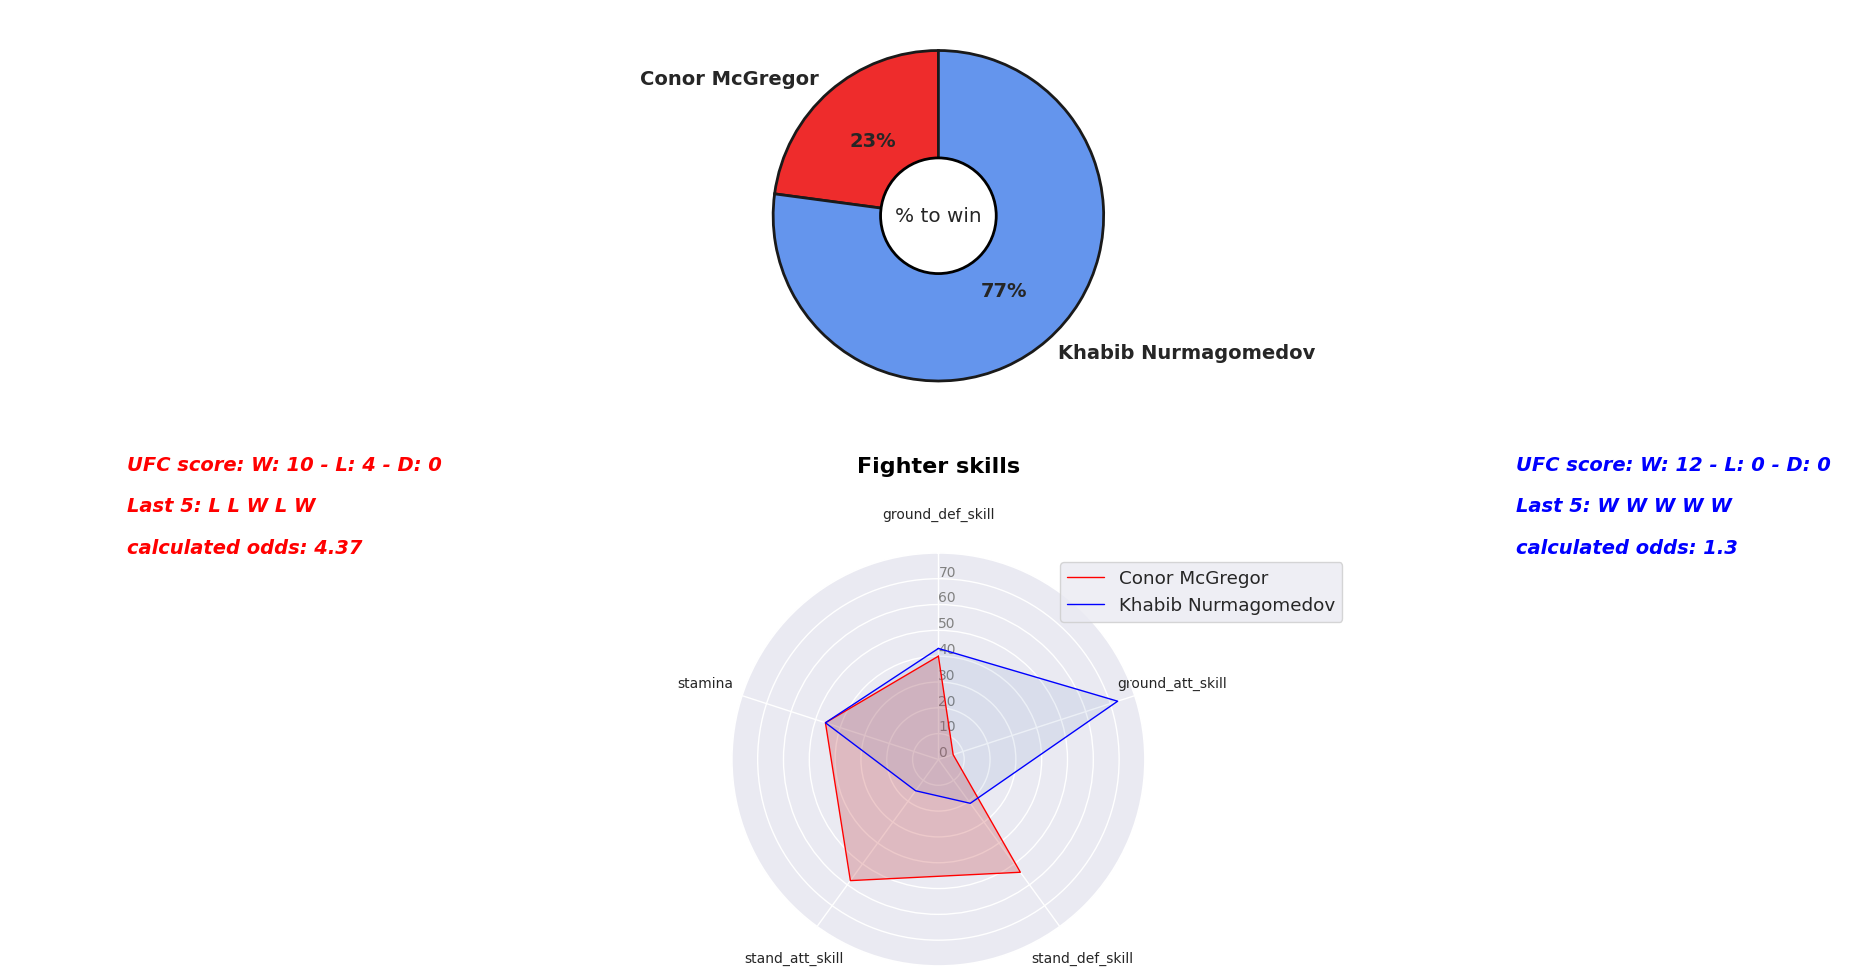

In [95]:
Head2Head('Conor McGregor','Khabib Nurmagomedov')

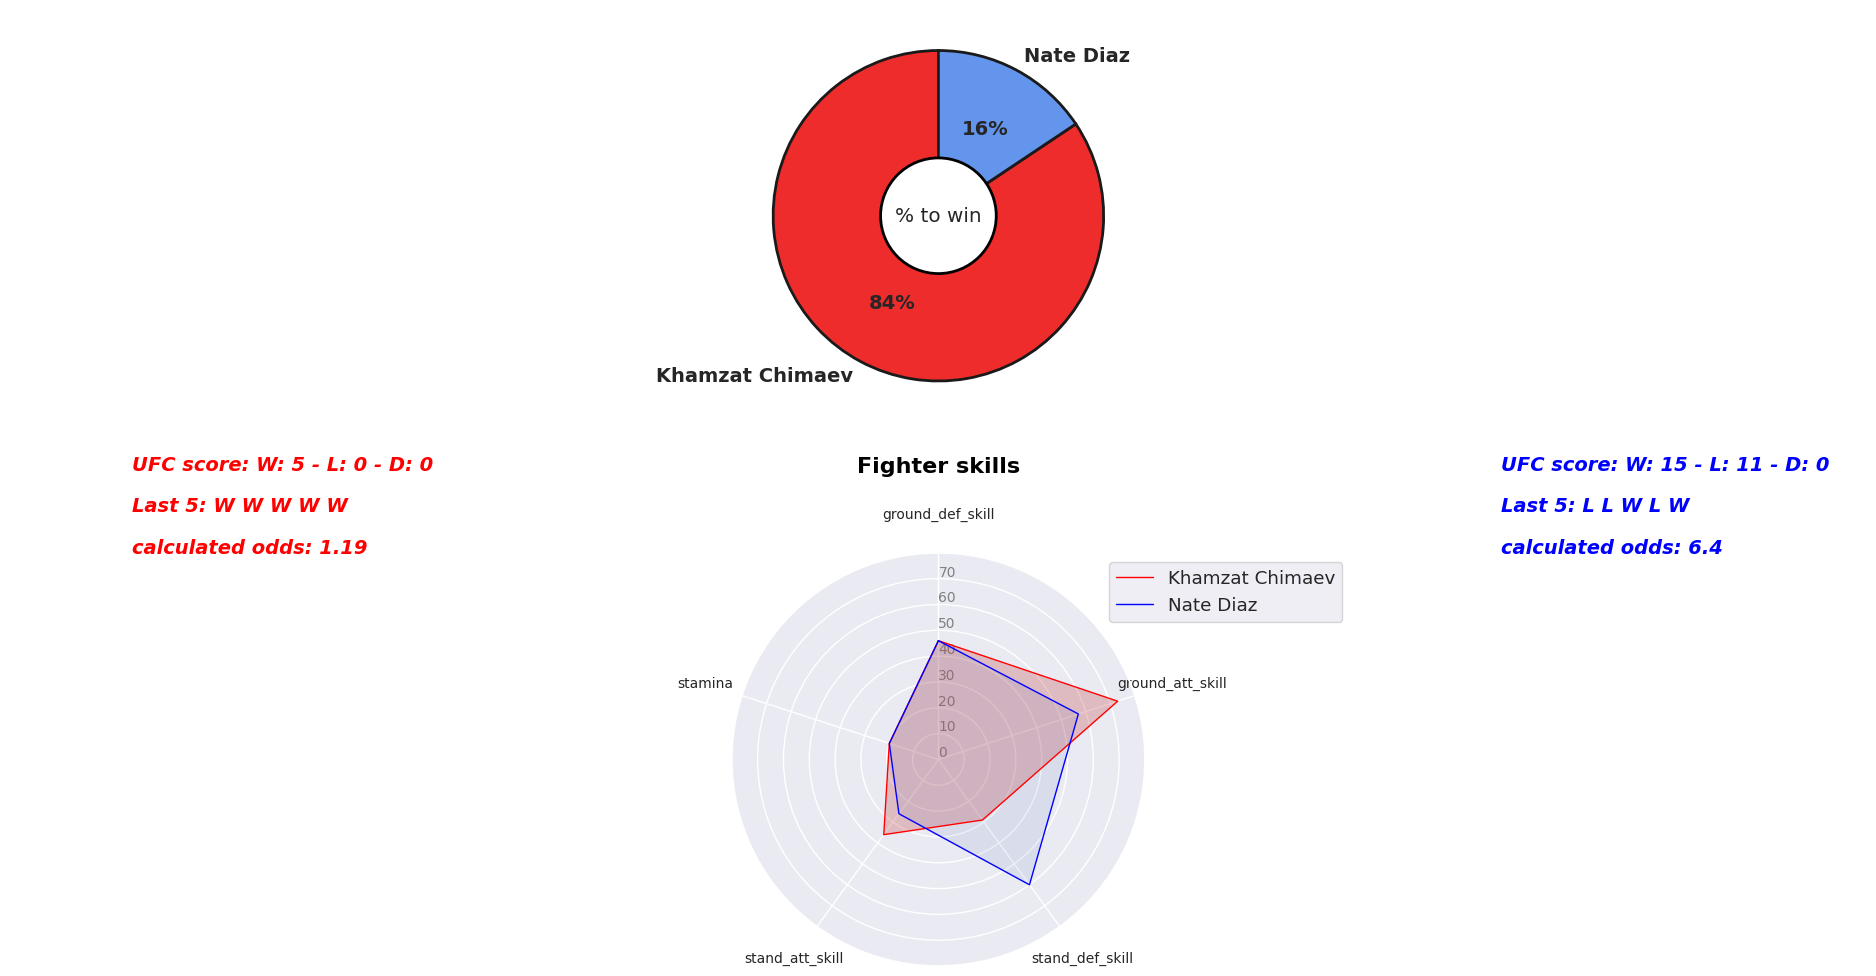

In [96]:
Head2Head('Khamzat Chimaev','Nate Diaz')

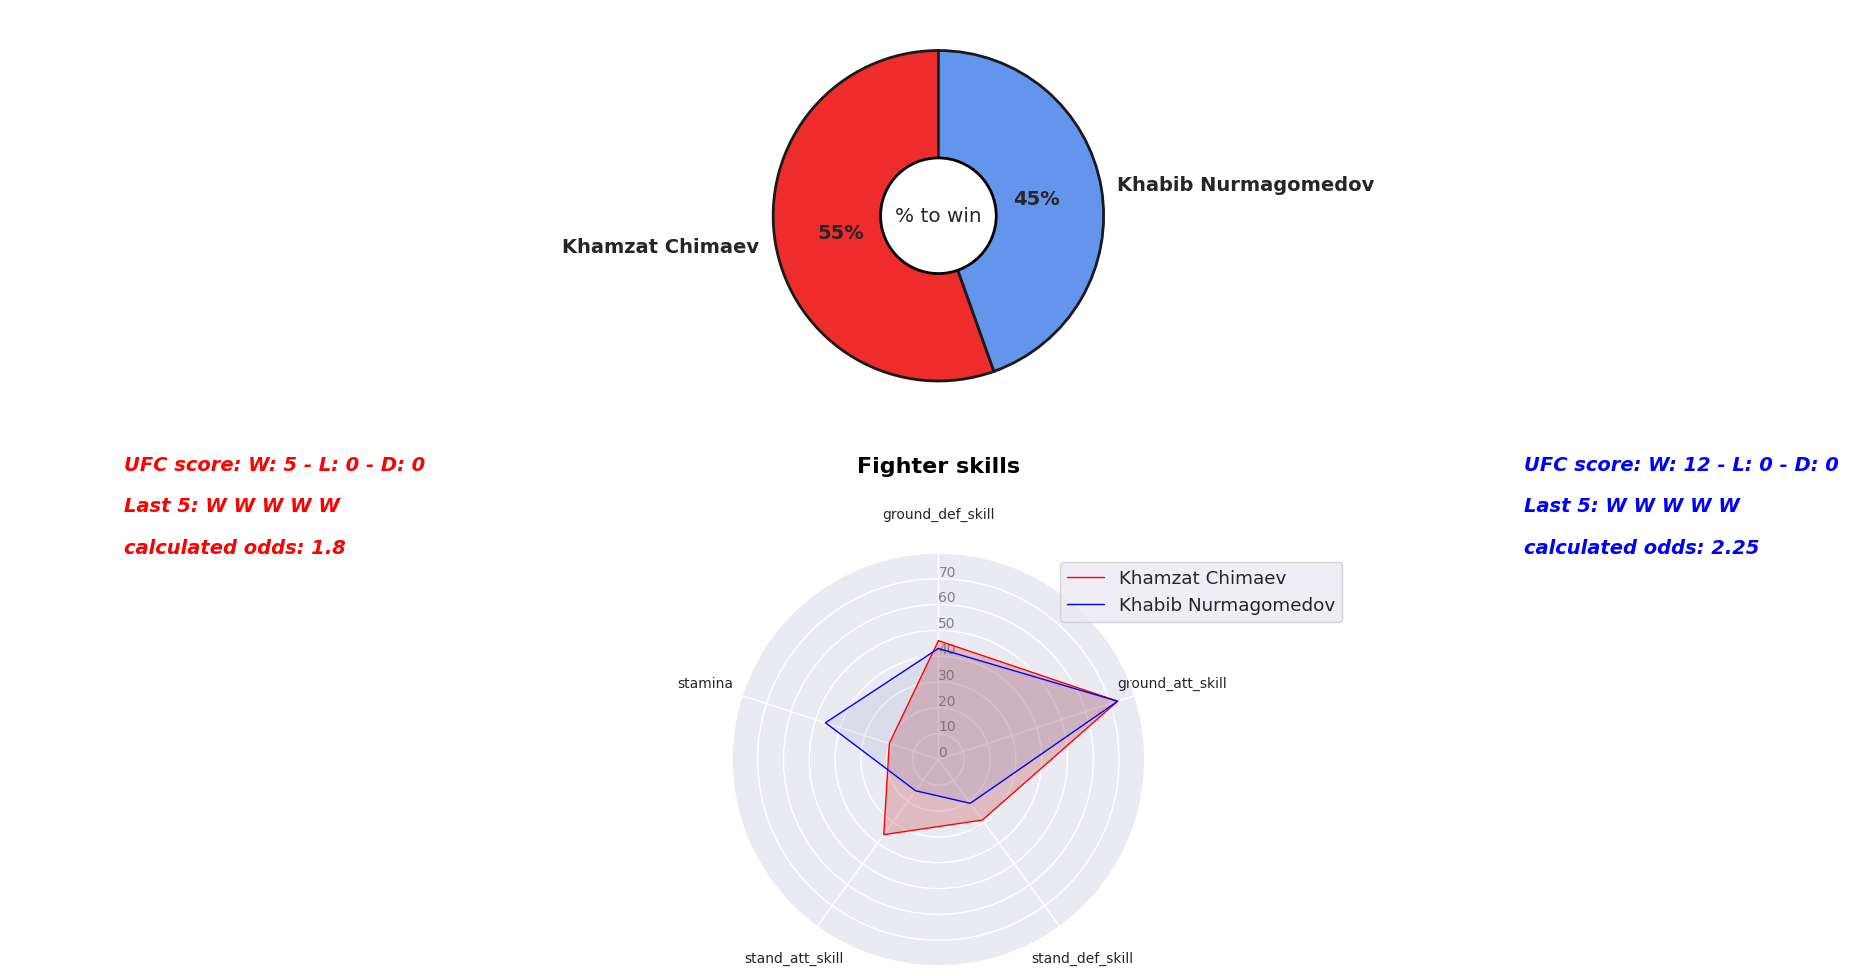

In [97]:
Head2Head('Khamzat Chimaev','Khabib Nurmagomedov')

Мой расчет навыков здесь очень простой. Выносливость учитывается в зависимости от того, сколько матчей выиграет боец, если бой перейдет в последующие раунды. Так что в случае с выносливостью Нейт выглядит плохо, потому что он проиграл 5-раундовые бои Эдвардсу и Макгрегору. Но этот простой расчет не отражает того, что пятый раунд против Эдвардса был лучшим раундом Нейта.